Data with Age Groups:
      Name  Age Age Group
0    Alice   12     Child
1      Bob   25     Youth
2  Charlie   37     Adult
3    David   45     Adult
4      Eva   63    Senior
5    Frank   18     Child
6    Grace   30     Youth
7   Hannah   60     Adult
8      Ian   28     Youth
9     Jack   50     Adult


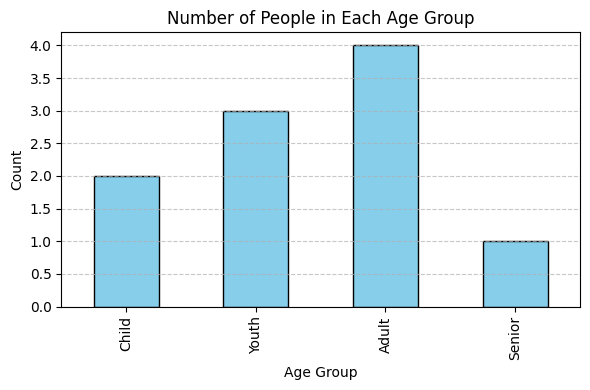

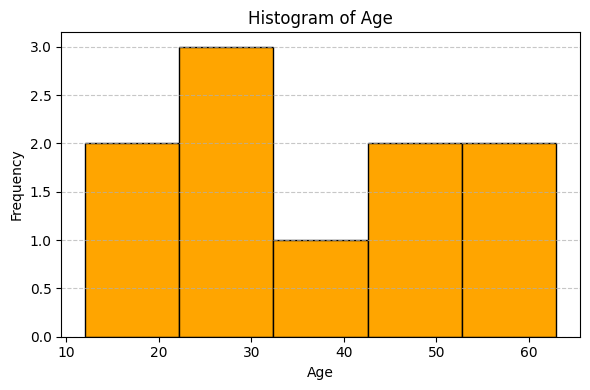

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: Names and Ages
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva',
             'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'Age': [12, 25, 37, 45, 63, 18, 30, 60, 28, 50]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Binning
# Define the bin edges and the labels
# Example bins: 0–18 (Child), 19–35 (Youth), 36–60 (Adult), 61+ (Senior)
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Senior']

# Apply binning to the 'Age' column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Print the DataFrame with the new Age Group column
print("Data with Age Groups:")
print(df)

# Bar Chart for age groups
# Count how many people fall into each group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of People in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram of Raw Age Data
# Plot a histogram of the original age values
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=5, color='orange', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Original Data:
[15 22 37 45 18 30 60 25 40 28 50 55 65]

Original Value → Bin Label:
15 → Bin 1
22 → Bin 1
37 → Bin 2
45 → Bin 3
18 → Bin 1
30 → Bin 2
60 → Bin 4
25 → Bin 1
40 → Bin 2
28 → Bin 2
50 → Bin 3
55 → Bin 4
65 → Bin 4


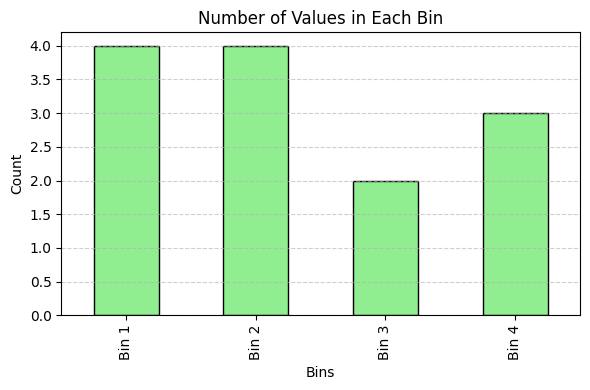

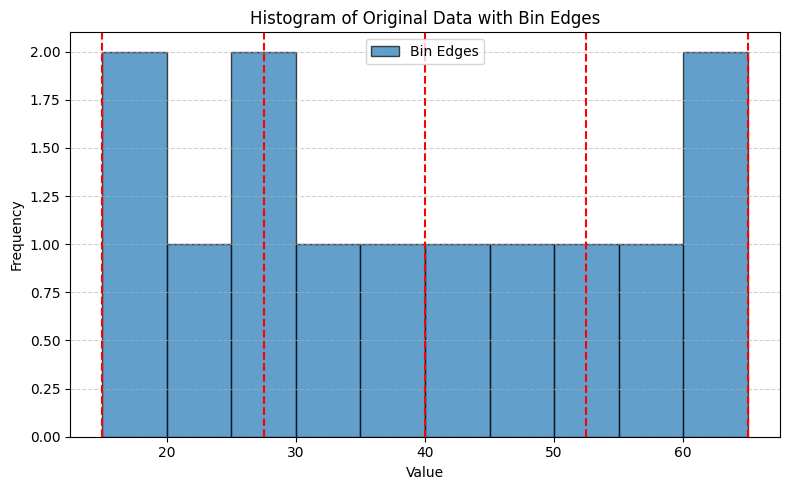

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input Numeric Data
data = pd.Series([15, 22, 37, 45, 18, 30, 60, 25, 40, 28, 50, 55, 65])

# Discretization (Binning)
num_bins = 4

# Calculate bin edges based on range
min_value = data.min()
max_value = data.max()
bin_width = (max_value - min_value) / num_bins
bins = [min_value + i * bin_width for i in range(num_bins + 1)]

# Create bin labels like Bin 1, Bin 2, ...
labels = [f"Bin {i+1}" for i in range(num_bins)]

# Apply binning
discretized_data = pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# Print Data
print("Original Data:")
print(data.values)

print("\nOriginal Value → Bin Label:")
for original, label in zip(data, discretized_data):
    print(f"{original} → {label}")

# Bar Chart of Bins
# Count how many values in each bin
bin_counts = discretized_data.value_counts().sort_index()

plt.figure(figsize=(6, 4))
bin_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Number of Values in Each Bin")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Histogram + Bin Edges
plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7, label='Original Data')

# Add red vertical lines at each bin edge
for bin_edge in bins:
    plt.axvline(x=bin_edge, color='red', linestyle='--')

plt.title('Histogram of Original Data with Bin Edges')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Bin Edges'])
plt.tight_layout()
plt.show()


Enter the number of bins: 10

Original Bins (Equi-depth):
Bin 1: [33, 38]
Bin 2: [45, 48]
Bin 3: [52, 56]
Bin 4: [61, 66]
Bin 5: [70, 74]
Bin 6: [77]
Bin 7: [87]
Bin 8: [89]
Bin 9: [90]
Bin 10: [92]

Bin Means:
Bin 1: [35.5, 35.5]
Bin 2: [46.5, 46.5]
Bin 3: [54.0, 54.0]
Bin 4: [63.5, 63.5]
Bin 5: [72.0, 72.0]
Bin 6: [77.0]
Bin 7: [87.0]
Bin 8: [89.0]
Bin 9: [90.0]
Bin 10: [92.0]

Bin Boundaries:
Bin 1: [33, 38]
Bin 2: [45, 48]
Bin 3: [52, 56]
Bin 4: [61, 66]
Bin 5: [70, 74]
Bin 6: [77]
Bin 7: [87]
Bin 8: [89]
Bin 9: [90]
Bin 10: [92]


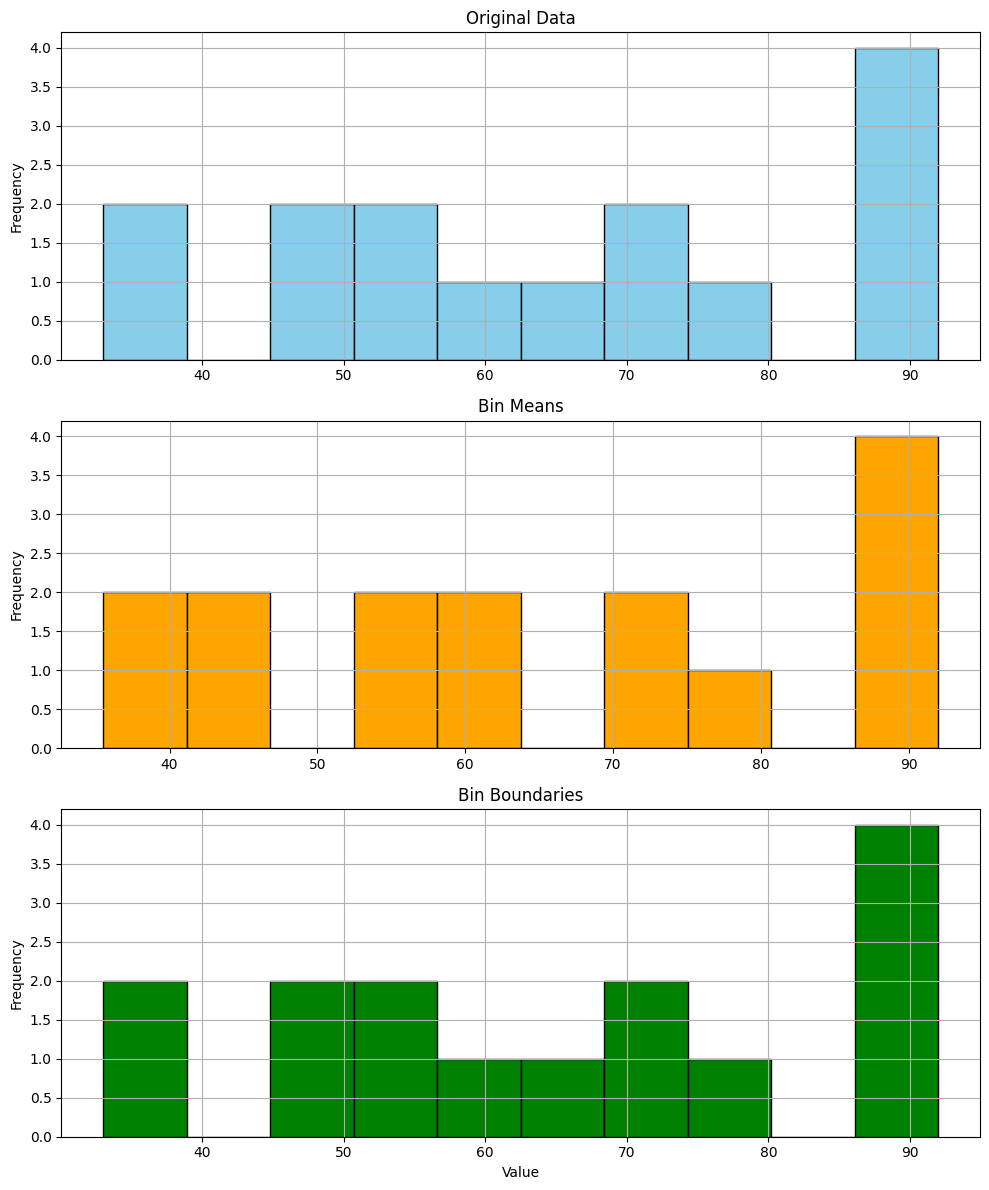

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
file_path = '/content/Data Descritization.csv'  # Change path as needed
df = pd.read_csv(file_path)

# Access the first column (you can change to column name if known)
data = df.iloc[:, 0].dropna().values  # Drop NaN for safety
data = sorted(data)  # Sort for binning

# User input for number of bins
num_bins = int(input("Enter the number of bins: "))
if num_bins > len(data):
    print("Number of bins cannot be greater than number of data points.")
    exit()

bin_size = len(data) // num_bins
remainder = len(data) % num_bins

# Create equi-depth bins
bins = []
start = 0
for i in range(num_bins):
    extra = 1 if i < remainder else 0  # Distribute remainder
    end = start + bin_size + extra
    bins.append(data[start:end])
    start = end

# Bin transformation - means
mean_bins = [np.full(len(b), np.mean(b)) for b in bins]

# Bin transformation - boundaries
boundary_bins = [
    [min(b) if val < (min(b) + max(b)) / 2 else max(b) for val in b] for b in bins
]

# === Print Results ===
print("\nOriginal Bins (Equi-depth):")
for i, b in enumerate(bins, 1):
    print(f"Bin {i}: {list(map(int, b))}")

print("\nBin Means:")
for i, b in enumerate(mean_bins, 1):
    print(f"Bin {i}: {list(map(lambda x: round(float(x), 1), b))}")

print("\nBin Boundaries:")
for i, b in enumerate(boundary_bins, 1):
    print(f"Bin {i}: {list(map(int, b))}")

# === Plot Histograms ===
original = data
means = np.concatenate(mean_bins)
boundaries = np.concatenate(boundary_bins)

titles = ["Original Data", "Bin Means", "Bin Boundaries"]
datasets = [original, means, boundaries]
colors = ["skyblue", "orange", "green"]

plt.figure(figsize=(10, 12))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.hist(datasets[i], bins=num_bins, color=colors[i], edgecolor='black')
    plt.title(titles[i])
    plt.ylabel("Frequency")
    if i == 2:
        plt.xlabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()
